# **Lab1c - Webscraping**

## Introduction

At the end of this laboratory, you should be able to:

*   scrape text from internet websites
*   scrate data from tables

Reminder: you need to show your results / submit this jupyter file to have your lab credited.

Now, let us begin!

First, let us import the standard packages that we need. We might need to install some packages in python in our local drive as needed. However, this file was checked to work in Google Colab as of 2023-08-25.

In [22]:
# Let us import that standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scraping texts (Option 1)

Let us take a website and see if we can scrape the texts from that website. For this example, let us use a static Wikipedia website (a fixed version) that gives a list of presidents of Vietnam.

Here is the link: https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497.

For this part (and with the intention of making a simple wordcloud as a visual), let us use the package wordcloud and urllib.

In [23]:
##install wordcloud
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import urllib

url = 'https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497'

Now, let us get the text that can be read from the url, as well as the *stopwords* (the words we will ignore).

In [4]:
text_cloud = urllib.request.urlopen(url).read().decode("utf-8")
stopwords = set(STOPWORDS)

print(text_cloud)
print(stopwords)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of presidents of Vietnam - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vecto

From this, we can generate a wordcloud:

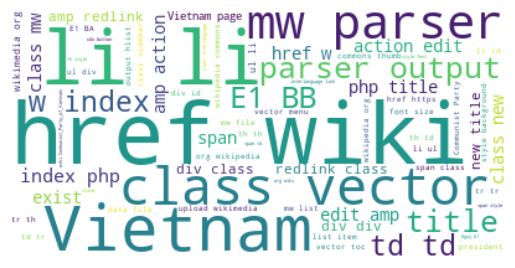

In [5]:
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
text_wc.generate(text_cloud)
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Congratulations! But this result looks weird, because a lot of stopwords are still present (these are html tags and options). What can we do about this? There are several options, and let's try the one below using the package BeautifulSoup.

## Scraping texts (Option 2)

Here, we will first extract the text from the website using the Python package beautifulsoup4. We will also need other support packages.

In [24]:
#!pip install beautifulsoup4
#!pip install requests

import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata

Now, let us try to get information from the website:

In [25]:
url= 'https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497'
response_wiki = requests.get(url)
response_wiki.status_code

200

The status code is 200, which means it is successful in getting data. If it is 400+ or 500+, then some error has occured. You can see the contents of the response, for example, by typing:

In [26]:
response_wiki.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of presidents of Vietnam - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled

Not so nice, right? Let us make it prettier by using prettify:

In [27]:
soup = BeautifulSoup(response_wiki.text)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of presidents of Vietnam - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-de

This puts some indentation into the text, and gives us an easier time to understand the html structure of the website. Notice that the text we want to get (the main paragraph) is inside a paragraph tag: \<p> and <\p>.

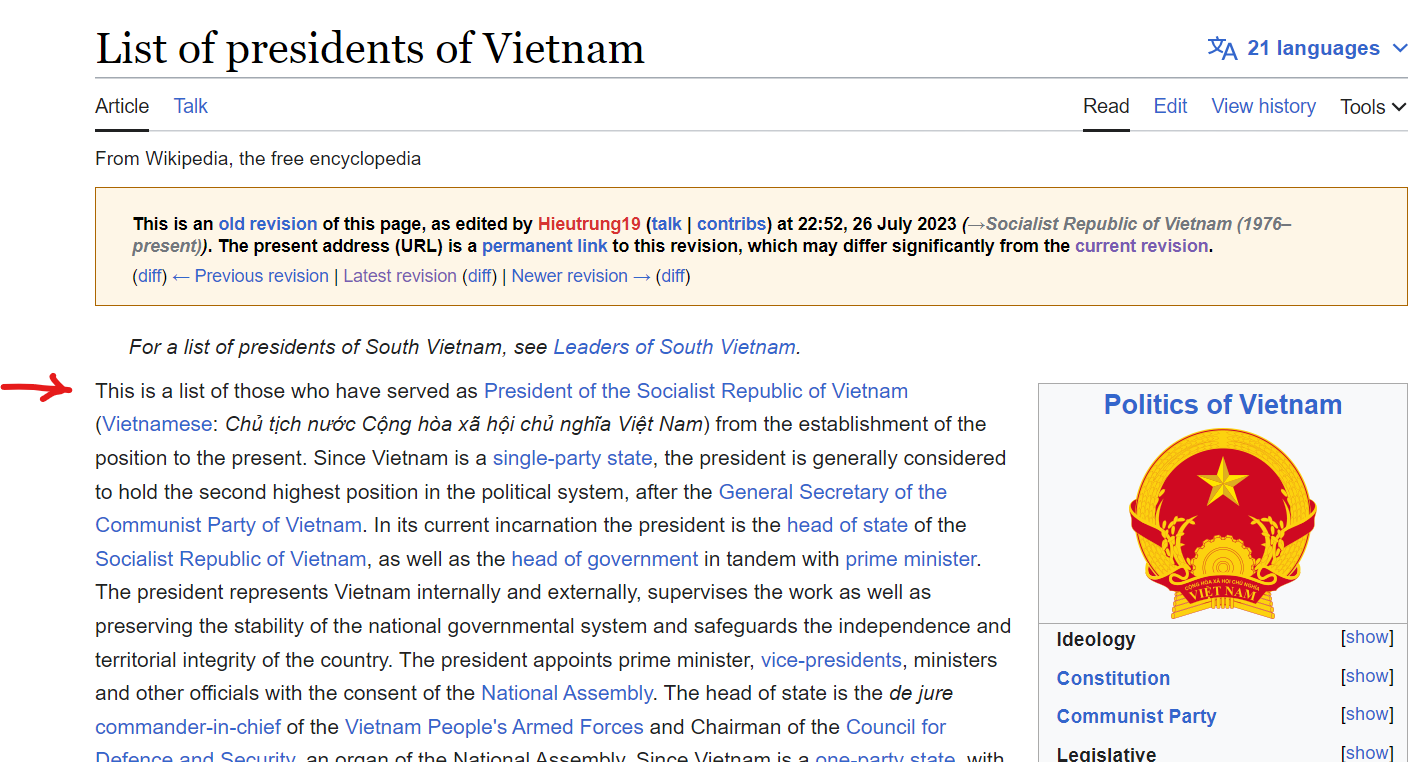

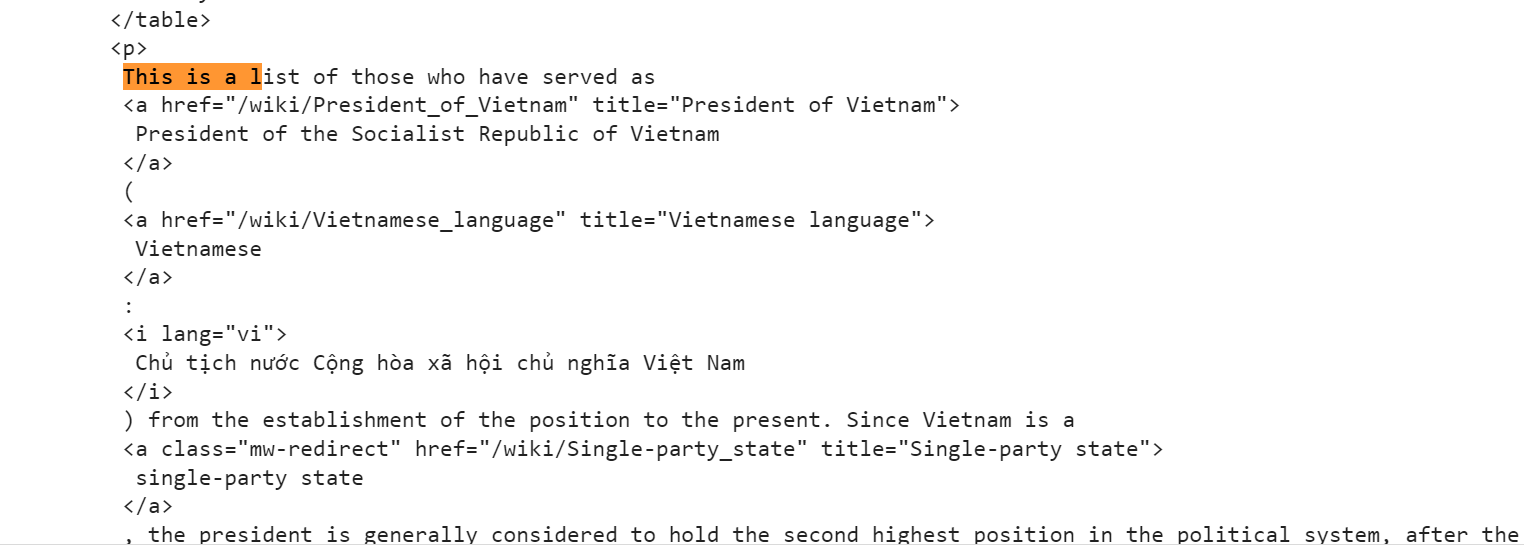

We will use BeautifulSoup to extract the contents of this text in the <p> tag using the find or find_all function.

In [28]:
para_all=soup.find_all('p')
para_all

[<p><b>This is an <a href="/wiki/Help:Page_history" title="Help:Page history">old revision</a> of this page, as edited by <span id="mw-revision-name"><a class="new mw-userlink" data-mw-revid="1167298497" href="/w/index.php?title=User:Hieutrung19&amp;action=edit&amp;redlink=1" title="User:Hieutrung19 (page does not exist)"><bdi>Hieutrung19</bdi></a> <span class="mw-usertoollinks">(<a class="mw-usertoollinks-talk" href="/wiki/User_talk:Hieutrung19" title="User talk:Hieutrung19">talk</a> | <a class="mw-usertoollinks-contribs" href="/wiki/Special:Contributions/Hieutrung19" title="Special:Contributions/Hieutrung19">contribs</a>)</span></span> at <span id="mw-revision-date">22:52, 26 July 2023</span><span id="mw-revision-summary"> <span class="comment">(<span dir="auto"><span class="autocomment"><a href="#Socialist_Republic_of_Vietnam_(1976–present)">→‎Socialist Republic of Vietnam (1976–present)</a></span></span>)</span></span>. The present address (URL) is a <a href="/wiki/Help:Permanent_l

Notice that the paragraph we want is in the third \<p> tag., Hence, we need para_all[2]. Moreover, the result has a data type that is not a string (We can check using type(para_all[2])) and so, we need to convert it to a string and ignore all the html tags using the get_text function.

In [29]:
# convert to a string
paragraph=para_all[2].get_text()

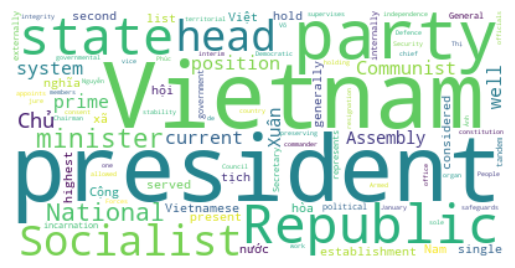

In [30]:
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

text_wc.generate(paragraph)
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

This looks a lot better. Now, if we want a statistical count of the words, we can try using the nltk package (natural language toolkit), and even output a bar plot of the frequency of each word.

<FreqDist with 130 samples and 236 outcomes>
[('the', 32), ('of', 21), ('is', 7), ('and', 7), ('Vietnam', 6), ('as', 5), ('Republic', 4), ('president', 4), ('The', 4), ('a', 3), ('Socialist', 3), ('head', 3), ('with', 3), ('have', 2), ('President', 2), ('position', 2), ('to', 2), ('Since', 2), ('state,', 2), ('in', 2), ('Communist', 2), ('Party', 2), ('current', 2), ('state', 2), ('well', 2), ('prime', 2), ('National', 2), ('Assembly.', 2), ('party', 2), ('Xuân', 2), ('This', 1), ('list', 1), ('those', 1), ('who', 1), ('served', 1), ('(Vietnamese:', 1), ('Chủ', 1), ('tịch', 1), ('nước', 1), ('Cộng', 1), ('hòa', 1), ('xã', 1), ('hội', 1), ('chủ', 1), ('nghĩa', 1), ('Việt', 1), ('Nam)', 1), ('from', 1), ('establishment', 1), ('present.', 1), ('single-party', 1), ('generally', 1), ('considered', 1), ('hold', 1), ('second', 1), ('highest', 1), ('political', 1), ('system,', 1), ('after', 1), ('General', 1), ('Secretary', 1), ('Vietnam.', 1), ('In', 1), ('its', 1), ('incarnation', 1), ('Viet

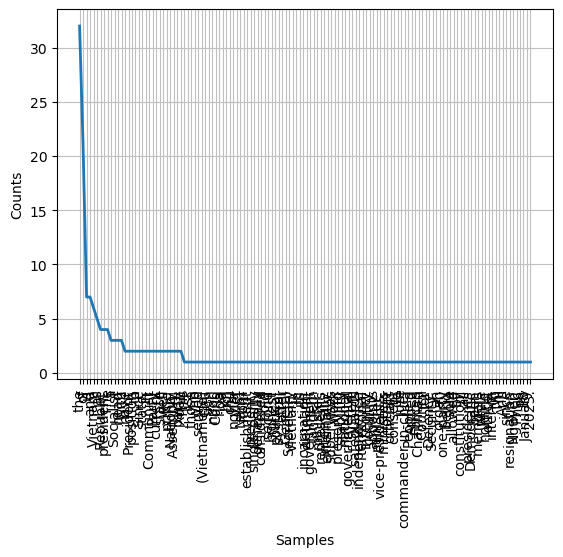

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
from nltk import FreqDist
words = paragraph.split()
fdist = FreqDist(words)
print(fdist)
print(fdist.most_common())
fdist.plot()

## Scraping tables

Probably, however, the information that we need is often stored in tables, such as the table present in the Wikipedia site that we have. Let us try to get the information from this table:

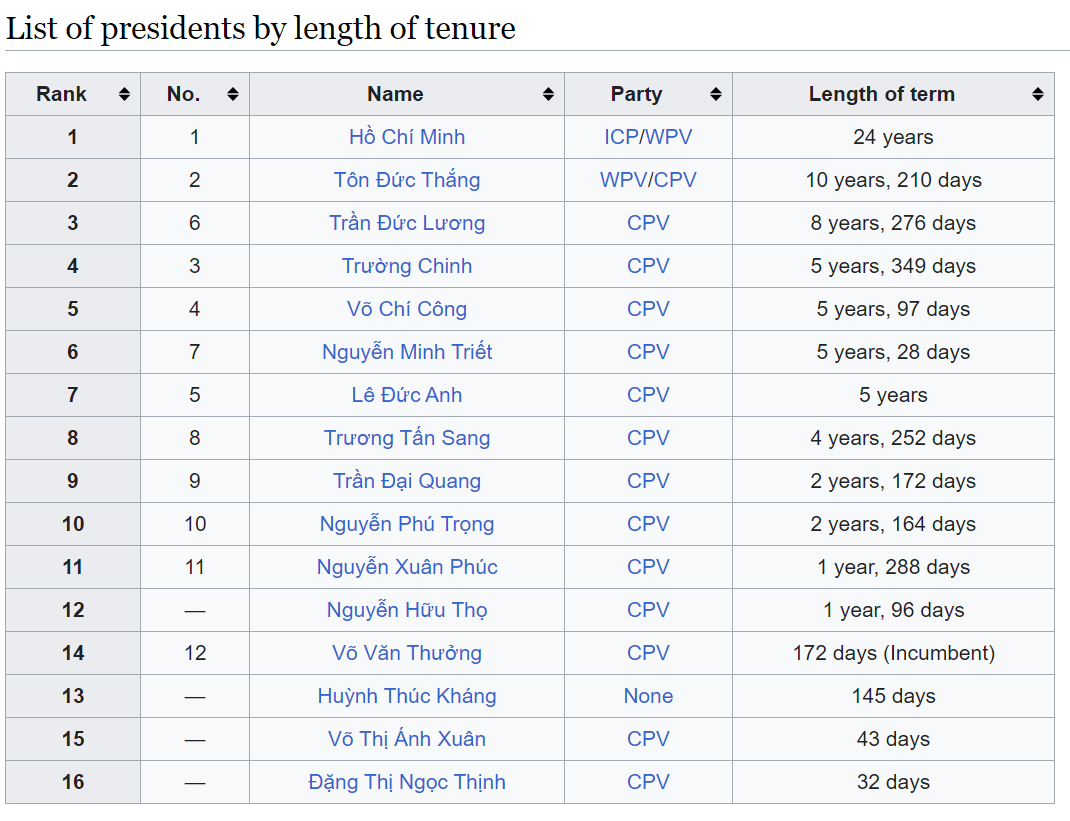

Running (right click on the table and "Inspect") shows that this is inside a \<table> tag.
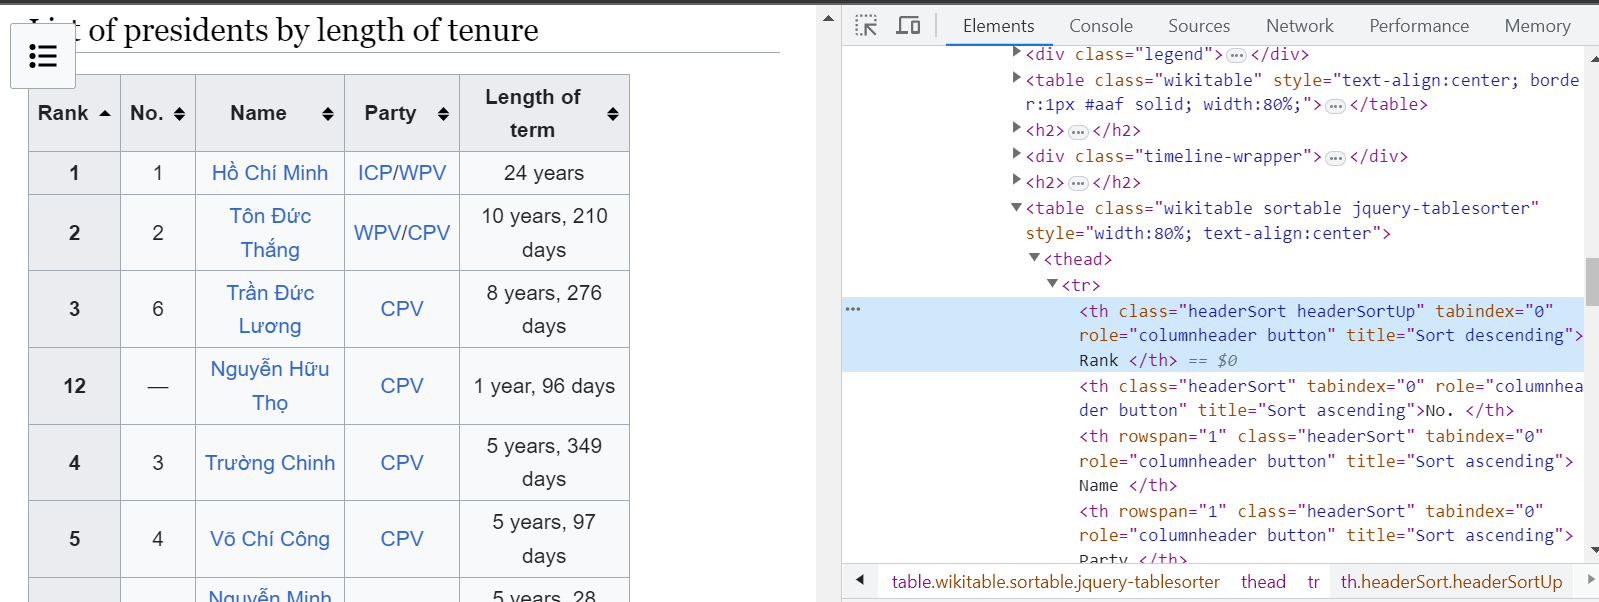

In [33]:
table_all=soup.find_all('table')

We need the 5th table (you can try looking for it manually).

In [34]:
table_all[4]

<table class="wikitable sortable" style="width:80%; text-align:center">
<tbody><tr>
<th>Rank
</th>
<th>No.
</th>
<th rowspan="1">Name
</th>
<th rowspan="1">Party
</th>
<th colspan="1">Length of term
</th></tr>
<tr>
<th data-sort-value="1">1
</th>
<td>1
</td>
<td><a href="/wiki/Ho_Chi_Minh" title="Ho Chi Minh">Hồ Chí Minh</a>
</td>
<td><a href="/wiki/Indochinese_Communist_Party" title="Indochinese Communist Party">ICP</a>/<a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">WPV</a>
</td>
<td>24 years
</td></tr>
<tr>
<th data-sort-value="2">2
</th>
<td>2
</td>
<td><a href="/wiki/T%C3%B4n_%C4%90%E1%BB%A9c_Th%E1%BA%AFng" title="Tôn Đức Thắng">Tôn Đức Thắng</a>
</td>
<td><a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">WPV</a>/<a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">CPV</a>
</td>
<td>10 years, 210 days
</td></tr>
<tr>
<th data-sort-value="3">3
</th>
<td>6
</td>
<td><a href="/wiki/Tr%E1%BA%A7n_%C4%90%

Here is the difficult part. The table headers (column names) are in \<th> tags, while the contents are in \<td> and \<tr> tags. For this, we provide functions and predefined code that will scrape these information (Taken from reference 2). Let us first extract the column names or headers. (The following function is taken from IBM Data Science Course.)

In [35]:
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [36]:
column_names = []

for row in table_all[4].find_all("th"): ##..............You need to input the table name here
    name=extract_column_from_header(row)
    if name is not None and len(name) > 0:
        column_names.append(name)

column_names

['Rank', 'No.', 'Name', 'Party', 'Length of term']

Now, we turn to the rows and individual cells. We create a dictionary for each column header and initialize each column.

In [37]:
pres_dict= dict.fromkeys(column_names)
pres_dict['Rank'] = []
pres_dict['Name'] = []
pres_dict['Party'] = []
pres_dict['Length of term'] = []

We now extract the table contents by looping. Each row is in a \<tr> tag, and each cell is in a \<td> tag. Thus, we need to loop over through all rows and find all the \<td>s.

In this example, the first \<td> is empty so we had to make an exception.

In [38]:
extracted_row = 0
for rows in table_all[4].find_all("tr"):
    row=rows.find_all('td')
    # first one is empty. This is a special case!
    if row==[]:
      continue

    pres_dict['Rank'].append(row[0].text.strip()) # needed to strip the extra linespace
    # No. is removed here because it is in a <th> tag and requires more complicated coding.
    pres_dict['Name'].append(row[1].text.strip())
    pres_dict['Party'].append(row[2].text.strip())
    pres_dict['Length of term'].append(row[3].text.strip())

Then, finally, we convert to a dataframe.

In [ ]:
df_pres=pd.DataFrame(pres_dict)
df_pres

## Your turn!
Do the same exercise using a different wikipedia website. This is a website about the ASEAN football federation.

Link: https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823

Exercise 1: Make a wordcloud for the paragraphs you can scrape.

Exercise 2: Scrape the 3rd table in the page and convert it into a dataframe. Hint: It has 5 columns.

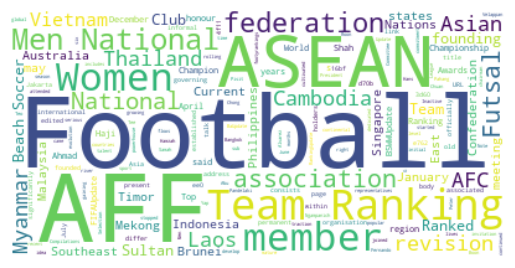

In [50]:
# Exercise 1:
# type your code here. Add code cells as needed
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata

url1= 'https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823'
response_wiki1 = requests.get(url1)
response_wiki1.text
response_wiki1.status_code
stopwords = set(STOPWORDS)
soup1=BeautifulSoup(response_wiki1.text)
para_all=soup1.find_all('p')
text=''.join([p.text for p in para_all])

text_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
text_wc.generate(text)
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
# Exercise 2:
# type your code here. Add code cells as needed

url = 'https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823' 
response_wiki = requests.get(url)
response_wiki.text
soup = BeautifulSoup(response_wiki.text)
table_all=soup.find_all('table')
tabale_all[2]


<table class="wikitable sortable">
<tbody><tr>
<th><a class="mw-redirect" href="/wiki/FIFA_country_code" title="FIFA country code"><style data-mw-deduplicate="TemplateStyles:r1038841319">'"`UNIQ--templatestyles-0000000E-QINU`"'</style><span class="rt-commentedText tooltip tooltip-dotted" title="FIFA country code">Code</span></a></th>
<th>Association</th>
<th>Joined in</th>
<th class="unsortable">National team</th>
<th class="unsortable">National league
</th></tr>
<tr>
<td align="center">AUS</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Australia" title="Australia"><img alt="Australia" class="mw-file-element" data-file-height="640" data-file-width="1280" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/23px-Flag_of_Australia_%28converted%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/35px-Flag_of_Austr

In [70]:
column_names=['Code','Association', 'Joined in', 'National team', 'National league']
#Note: using the function above will result to "Code" not being detected because of more complicated coding.
pres_dict= dict.fromkeys(column_names)
pres_dict['Code'] = []
pres_dict['Association'] = []
pres_dict['Joined in'] = []
pres_dict['National team'] = []
pres_dict['National league'] = []


In [69]:

extracted_row = 0
for rows in table_all[2].find_all("tr"):   #loop through all trs
    row=rows.find_all('td')                #find all td and save in row
    if row==[]:                            #   if row==[]:
      continue                
    
    #       continue
    pres_dict['Code'].append(row[0].text.strip())             # save all in the dictionary (use .append
    pres_dict['Association'].append(row[1].text.strip())
    pres_dict['Joined in'].append(row[2].text.strip())
    pres_dict['National team'].append(row[3].text.strip())
    pres_dict['National league'].append(row[4].text.strip())
df=pd.DataFrame(pres_dict)                #now, convert into a pandas dataframe
df                              


,Code,Association,Joined in,National team,National league
0,AUS,Australia,2013,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
1,BRU,Brunei Darussalam*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,(Men)
2,CAM,Cambodia,1996,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
3,IDN,Indonesia*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
4,LAO,Laos,1996,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
5,MAS,Malaysia*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
6,MYA,Myanmar,1996,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
7,PHI,Philippines*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
8,SGP,Singapore*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"
9,THA,Thailand*,1984,Men'sU23U20U17U15FBSWomen'sW U20W U17,"(Men, Women)"


## Congratulations

You have finished this module.

## Acknowledgement, Ownership, and References

This notebook is prepared by Emmanuel Plan (emmanuelplan@hsb.edu.vn) for HSB3119: Introduction to Data Science.


## References
1.   Jupyter Notebook of HSB1003 Data Analysis for MAS2, Emmanuel Plan, 2022-2023 Semester 1.
2.   Personal notes from IBM Data Science Course, Emmanuel Plan


### Changelog

1.   2023-08-24: Drafted initial version

